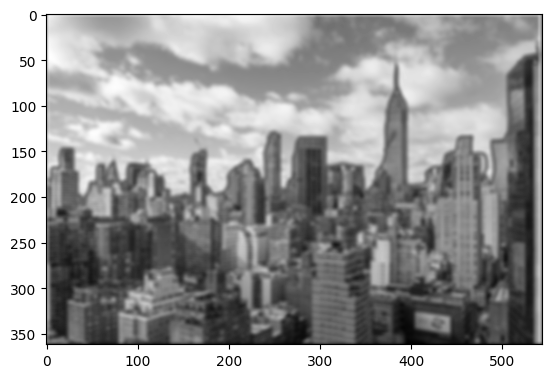

In [59]:
import skimage
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
import imageio
from PIL import Image

def read_img(img_name, img_dir = 'images_in/hybrid/', grayscale=False):
    img = Image.open(img_dir + '/' + img_name)
    if grayscale:
        img = img.convert('L')
    img = np.array(img)
    img = img / 255
    return img

def create_gaussian_2d(sigma=3, ksize=19):
    gaussian_1d = cv2.getGaussianKernel(ksize, sigma)
    gaussian_2d = np.outer(gaussian_1d, gaussian_1d)
    return gaussian_2d

def convolve(filter, img):
    res = scipy.signal.convolve(img, filter, mode='same')
    res = np.clip(res, a_min=0, a_max=1)
    return res

rgb_2_gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114])


nyc_img = read_img('nyc_mask.jpg', img_dir='images_in/blends/')
nyc_gs = rgb_2_gray(nyc_img)
plt.imshow(nyc_img)
nyc_gs = rgb_2_gray(nyc_img)
nyc_gs_blur = convolve(create_gaussian_2d(sigma=2, ksize=7), nyc_gs)
plt.imshow(nyc_gs_blur, cmap='gray')

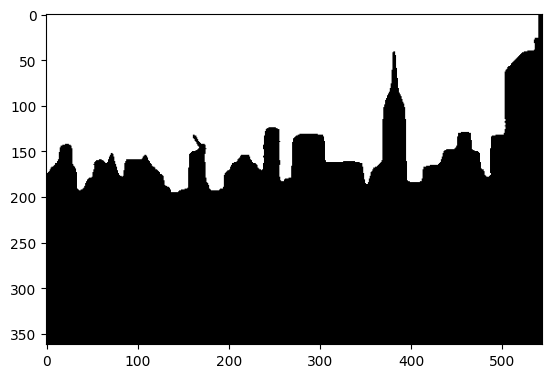

: 

In [61]:
nyc_img = read_img('nyc_mask.jpg', img_dir='images_in/blends/')
nyc_gs = rgb_2_gray(nyc_img)
segmented = rgb_2_gray(read_img('segmentation.png', img_dir='images_in/blends/'))
h, w = segmented.shape
mask = np.zeros_like(nyc_gs)
mask[:h, :w] = segmented
mask = (mask > 0).astype(np.uint8) * 255
plt.imshow(mask, cmap='gray')


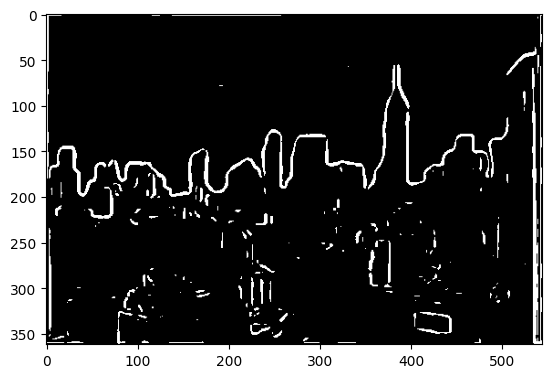

In [51]:
nyc_edge = skimage.filters.sobel(nyc_gs_blur)
plt.imshow(nyc_edge, cmap='gray')
nyc_thresholded = (nyc_edge > 0.09).astype(np.uint8) * 255
plt.imshow(nyc_thresholded, cmap='gray')

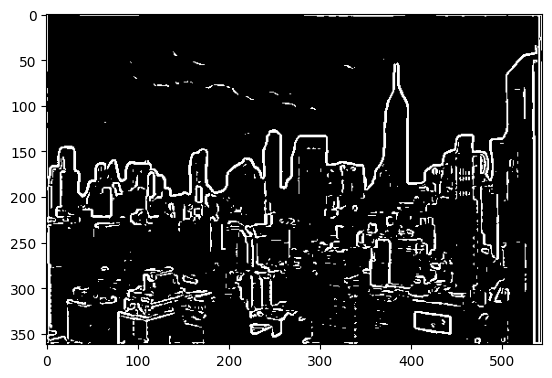

In [40]:
nyc_edge = skimage.filters.sobel(nyc_gs_blur)
plt.imshow(nyc_edge, cmap='gray')
# nyc_edge = convolve(create_gaussian_2d(sigma=1, ksize=7), nyc_edge)
nyc_thresholded = (nyc_edge > 0.1).astype(np.uint8) * 255
plt.imshow(nyc_thresholded, cmap='gray')

In [4]:
# Load the image in grayscale
image = nyc_thresholded

# Define seed point (you can choose any point)
seed = (0, 0)

# Define a threshold for region growing
threshold = 30

# Create a mask to store the segmented region
height, width = image.shape[:2]
segmented = np.zeros((height, width), np.uint8)

# Stack to hold the coordinates for DFS
stack = []

# Push the seed point to the stack
stack.append(seed)

# Define a function to check if a point is within the image boundaries
def is_valid(point):
    x, y = point
    return 0 <= x < width and 0 <= y < height

# Define a function to compute the similarity measure
def similarity(pixel1, pixel2):
    return abs(int(pixel1) - int(pixel2))

# Region growing algorithm using DFS
while stack:
    x, y = stack.pop()

    if is_valid((x, y)) and not segmented[y, x]:
        if similarity(image[y, x], image[seed[1], seed[0]]) < threshold:
            segmented[y, x] = 255  # Set the pixel to white in the mask
            # Add neighboring pixels to the stack
            stack.extend([(x+1, y), (x-1, y), (x, y+1), (x, y-1)])

# Display the segmented region
cv2.imshow('Segmented Region', segmented)
cv2.waitKey(1000)
cv2.destroyAllWindows()


2023-09-17 11:33:55.521 Python[75744:3336900] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.
